## 绘制分布及回归图片

In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata')


In [6]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')


# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 转换数据结构
data['entity'] = data['Province']  # 替换为实体列的名称
data['time'] = data['Year']  # 替换为时间列的名称

# 定义仅包含“热浪暴露”与“死亡人数”的回归公式
formula = 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund'

# 拟合回归模型
model = sm.OLS.from_formula(formula, data).fit()

# 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     356.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          4.03e-196
Time:                        17:18:23   Log-Likelihood:                -7892.6
No. Observations:                 619   AIC:                         1.580e+04
Df Residuals:                     612   BIC:                         1.583e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.01e-34
Time:                        17:21:39   Log-Likelihood:                -8296.0
No. Observations:                 620   AIC:                         1.660e+04
Df Residuals:                     618   BIC:                         1.660e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

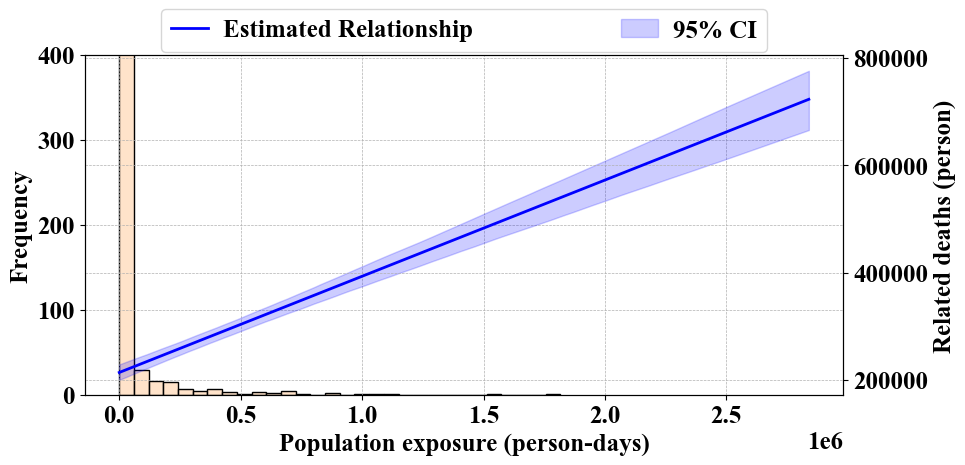

In [3]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 重命名列名，处理特殊字符
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 转换数据结构
data['entity'] = data['Province']  # 替换为实体列的名称
data['time'] = data['Year']  # 替换为时间列的名称

# 定义仅包含“热浪暴露”与“死亡人数”的回归公式
formula = 'Death_toll ~ Population_Exposure_TX90'

# 拟合回归模型
model = sm.OLS.from_formula(formula, data).fit()

# 输出回归结果
print(model.summary())

# 设置x轴（热浪暴露水平）的取值范围
x_values = np.linspace(data['Population_Exposure_TX95'].min(), data['Population_Exposure_TX90'].max(), 100)

# 手动引导置信区间
n_bootstraps = 1000
bootstrap_preds = []

# 生成引导样本并拟合模型以获得预测值
for _ in range(n_bootstraps):
    sample_data = data.sample(frac=1, replace=True)
    model_bootstrap = sm.OLS.from_formula(formula, sample_data).fit()
    bootstrap_preds.append(model_bootstrap.predict(pd.DataFrame({'Population_Exposure_TX90': x_values})))

# 转换为numpy数组并计算置信区间的百分位数
bootstrap_preds = np.array(bootstrap_preds)
lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

# 从原始模型获取预测值，用于估计关系曲线
predicted_values = model.predict(pd.DataFrame({'Population_Exposure_TX90': x_values}))

# 绘图
fig, ax1 = plt.subplots(figsize=(10,5))

# 绘制热浪暴露的频率分布直方图
sns.histplot(data['Population_Exposure_TX95'], bins=30, color='peachpuff', kde=False, ax=ax1)
ax1.set_xlabel('Population exposure (person-days)')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0, 400)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 绘制估计关系曲线和置信区间
ax2 = ax1.twinx()
ax2.plot(x_values, predicted_values, color='blue', lw=2, label='Estimated Relationship')
ax2.fill_between(x_values, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI')
ax2.set_ylabel('Related deaths (person)')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# 标题和布局
plt.legend(fontsize=18, bbox_to_anchor=(0.1, 1.01, 0.8, 1.12), loc='lower left', handletextpad=0.6,
           ncol=10, mode="expand", borderaxespad=0., handlelength=1.5)
plt.tight_layout()
plt.savefig('00 Effects of Population Exposure on Deaths.png', dpi=400, facecolor="none", transparent=True, bbox_inches='tight')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_TX95',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats-TX95.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats-TX95.csv


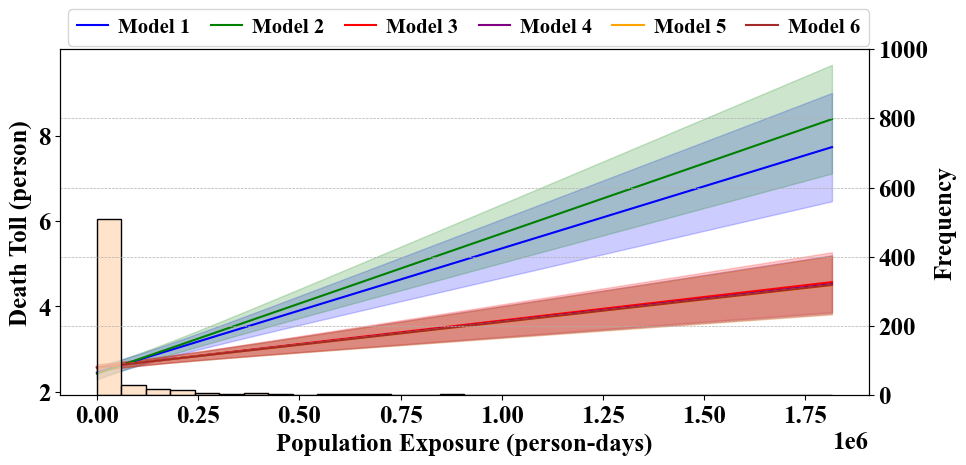

In [8]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_TX95',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_TX95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Define colors for each model's line for distinction
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Set up plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Define x values for plotting (range of Population_Exposure_TX90)
x_values = np.linspace(data['Population_Exposure_TX95'].min(), data['Population_Exposure_TX95'].max(), 100)

# Plot each model's regression line with confidence interval
for i, formula in enumerate(formulas):
    model = smf.ols(formula, data=data).fit()
    
    # Predictions for each x value
    pred_data = pd.DataFrame({
        'Population_Exposure_TX95': x_values,
        'Urbanization_ratio': np.mean(data['Urbanization_ratio']),
        'ln_Number_of_beds': np.mean(data['ln_Number_of_beds']),
        'ln_Total_Precipitation': np.mean(data['ln_Total_Precipitation']),
        'ln_GDP_per_capita': np.mean(data['ln_GDP_per_capita']),
        'ln_Educational_fund': np.mean(data['ln_Educational_fund'])
    })
    preds = model.get_prediction(pred_data)
    pred_summary = preds.summary_frame(alpha=0.05)  # 95% CI

    # Plot regression line
    ax1.plot(x_values, pred_summary['mean'], color=colors[i], label=f'Model {i+1}')
    # Plot confidence interval
    ax1.fill_between(x_values, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color=colors[i], alpha=0.2)

# Scale y-axis by 1e5 and adjust tick labels
ax1.set_yticks(np.arange(2, 10, 2) * 1e5)
ax1.set_yticklabels([str(int(tick/1e5)) for tick in ax1.get_yticks()])
ax1.set_ylabel('Death Toll (person)')
ax1.set_xlabel('Population Exposure (person-days)')

# Add a second y-axis for the histogram plot
ax2 = ax1.twinx()
sns.histplot(data['Population_Exposure_TX95'], bins=30, color='peachpuff', kde=False, ax=ax2)
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 1000)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# 标题和布局
ax1.legend(fontsize=15, bbox_to_anchor=(0.01, 1.01, 0.99, 1.12), loc='lower left', handletextpad=0.5,
           ncol=10, mode="expand", borderaxespad=0., handlelength=1.5)
plt.tight_layout()
plt.savefig('00 Effects of Population Exposure on Deaths-TX95.png', dpi=400, facecolor="none", transparent=True, bbox_inches='tight')
plt.show()


In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_TX99',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats-TX99.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats-TX99.csv


In [108]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_TX99',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_TX99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats-TX99.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats-TX99.csv


In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_P90',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_P90 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_P90 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_P90 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_P90 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_P90 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats_P90.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats_P90.csv


In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_P95',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_P95 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_P95 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_P95 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_P95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_P95 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats_P95.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats_P95.csv


In [11]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas = [
    'Death_toll ~ Population_Exposure_P99',  # Model 1: Only Exposure
    'Death_toll ~ Population_Exposure_P99 + Urbanization_ratio',  # Model 2: + GDP
    'Death_toll ~ Population_Exposure_P99 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    'Death_toll ~ Population_Exposure_P99 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation ',  # Model 4: + Beds
    'Death_toll ~ Population_Exposure_P99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    'Death_toll ~ Population_Exposure_P99 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation
]

# Collect results for each model
results = []

for i, formula in enumerate(formulas, 1):
    model = smf.ols(formula, data=data).fit()
    coef = model.params
    std_err = model.bse
    p_values = model.pvalues
    n = model.nobs
    adj_r2 = model.rsquared_adj
    bic = model.bic
    
    # Add statistics for each model
    result = pd.DataFrame({
        'Variable': coef.index,
        f'coef_Model_{i}': coef.values,
        f'std_err_Model_{i}': std_err.values,
        f'p_value_Model_{i}': p_values.values
    })
    result.loc[len(result.index)] = ['N', n, np.nan, np.nan]
    result.loc[len(result.index)] = ['Adjusted R2', adj_r2, np.nan, np.nan]
    result.loc[len(result.index)] = ['BIC', bic, np.nan, np.nan]
    
    results.append(result)

# Combine results into a summary table
summary_table = pd.concat(results).reset_index(drop=True)

# Save summary table as CSV
output_path = 'summary_panel_regression_results_with_stats_P99.csv'
summary_table.to_csv(output_path, index=False)

print(f"Summary table saved as CSV at: {output_path}")


Summary table saved as CSV at: summary_panel_regression_results_with_stats_P99.csv
